Logistic Regression prep 

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#import practice data set
from sklearn.datasets import load_iris
%matplotlib inline

In [18]:
# fiddle with the data
iris = load_iris()
target_names = iris.target_names
feature_names = iris.feature_names
print(target_names)
print(feature_names)

targets_idx = np.where(iris.target > 0)
X,Y = iris.data[targets_idx], iris.target[targets_idx]

#Shuffle, becuase you gotta
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# train and tets
X_train, Y_train = X[:70], Y[:70]
X_test, Y_test = X[70:], Y[70:]

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


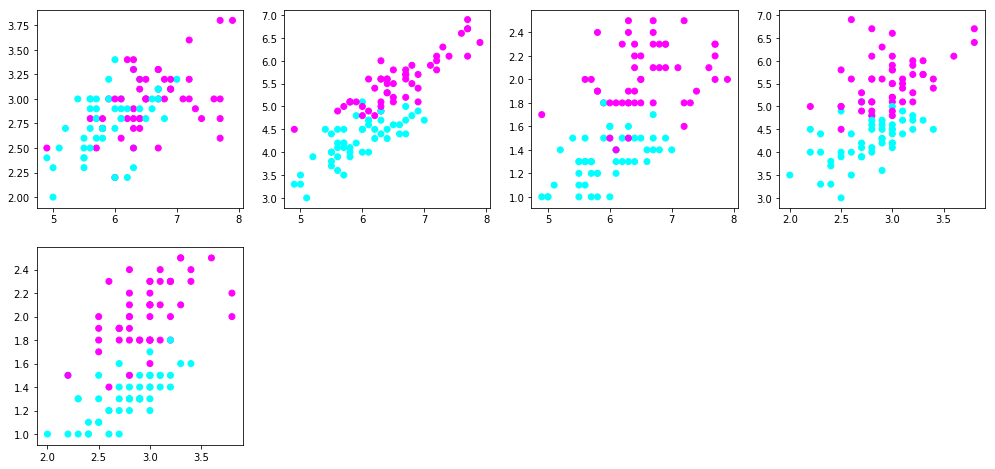

In [22]:
#some plotting
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(2,4,1)
ax1.scatter(X[:,0], X[:,1], c = Y, cmap=plt.cm.cool)

ax2 = fig.add_subplot(2,4,2)
ax2.scatter(X[:,0], X[:,2], c = Y, cmap=plt.cm.cool)

ax3 = fig.add_subplot(2,4,3)
ax3.scatter(X[:,0], X[:,3], c = Y, cmap=plt.cm.cool)

ax4 = fig.add_subplot(2,4,4)
ax4.scatter(X[:,1], X[:,2], c = Y, cmap=plt.cm.cool)

ax5 = fig.add_subplot(2,4,5)
ax5.scatter(X[:,1], X[:,3], c = Y, cmap=plt.cm.cool)


In [24]:
# the logistic regression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
preds = lr.predict(X_test)
accuracy  = np.mean(preds == Y_test)

print(accuracy)

#we can obtain probabilites with sigmoid function
probs = lr.predict_proba(X_test)

0.966666666667


In [26]:
#Best L2-Regularization? L1-regularization is similar
c_vec = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]

for c in c_vec:
    lr = LogisticRegression(penalty='l2', C=c)
    lr.fit(X_train,Y_train)
    preds = lr.predict(X_test)
    accuracy = np.mean(preds == Y_test)
    print(c)
    print(accuracy)


0.0001
0.533333333333
0.001
0.533333333333
0.01
0.666666666667
0.1
0.966666666667
1
0.966666666667
10
0.933333333333
100
0.933333333333
1000
0.966666666667
10000
0.9
100000
0.9
